# CLUSTERING

To metoda polegająca na podziale zbioru danych na grupy, zwane klastrami. W obrębie jednej grupy znajdują się obiekty podobne do siebie, a różne od obiektów z innych grup. W naszym przypadku chcemy podzielić piosenki na grupy, które będą podobne do siebie pod względem sentymentu i emocji, a także podobne do siebie pod względem słów występujących w tekście.
Przetestowane zostaną dwa podejścia analiza całego tekstu piosenki oraz analiza skróconego tekstu piosenki. W przypadku analizy skróconego tekstu piosenki.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

In [73]:
df = pd.read_csv('data_sentiment_emotion_3600.csv')

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                3600 non-null   object 
 1   tag                  3600 non-null   object 
 2   artist               3600 non-null   object 
 3   year                 3600 non-null   int64  
 4   views                3600 non-null   int64  
 5   features             3600 non-null   object 
 6   lyrics               3600 non-null   object 
 7   id                   3600 non-null   int64  
 8   decade               3600 non-null   object 
 9   lyrcis_preprocessed  3600 non-null   object 
 10  sentiment            3600 non-null   object 
 11  compound             3600 non-null   float64
 12  sentiment_category   3600 non-null   object 
 13  emotion              3600 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 393.9+ KB


In [74]:
df.head(2)

,title,tag,artist,year,views,features,lyrics,id,decade,lyrcis_preprocessed,sentiment,compound,sentiment_category,emotion
0,Rocky Mountain High,country,John Denver,1972,34529,{},[Verse 1]\nHe was born in the summer of his 27...,2873,1970s,born summer year comin' home place hed never l...,"{'neg': 0.11, 'neu': 0.824, 'pos': 0.066, 'com...",-0.8498,Negative,"{'Happy': 0.04, 'Angry': 0.01, 'Surprise': 0.0..."
1,New Kid in Town,country,Eagles,1976,76529,{},"[Verse 1]\nThere's talk on the street, it soun...",54282,1970s,talk street sound familiar great expectation e...,"{'neg': 0.029, 'neu': 0.756, 'pos': 0.215, 'co...",0.9838,Positive,"{'Happy': 0.39, 'Angry': 0.03, 'Surprise': 0.1..."


In [80]:
df_emotions = pd.DataFrame()
emotion_columns = ['emotion_Happy', 'emotion_Angry', 'emotion_Surprise', 'emotion_Sad', 'emotion_Fear']
df_emotions[emotion_columns] = pd.DataFrame(df['emotion'].apply(eval).apply(pd.Series).add_suffix('emotion'), index=df.index)
df_emotions.head()


,emotion_Happy,emotion_Angry,emotion_Surprise,emotion_Sad,emotion_Fear
0,0.04,0.01,0.05,0.45,0.45
1,0.39,0.03,0.10,0.42,0.05
2,0.43,0.00,0.00,0.14,0.43
3,0.52,0.10,0.00,0.29,0.10
4,0.04,0.23,0.31,0.31,0.12


In [81]:
# Wersja 2 - tylko emotion i compound

all_features = pd.concat([df['compound'], df_emotions], axis=1)

# Normalize the feature vector
scaler = StandardScaler()
normalized_features = scaler.fit_transform(all_features)

# Apply KMeans clustering
num_clusters = 50  # Adjust the number of clusters based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(normalized_features)


df = pd.concat([df, df_emotions], axis=1)

# Display the DataFrame with cluster labels
df[['compound','emotion_Happy','emotion_Angry','emotion_Surprise','emotion_Sad','emotion_Fear','cluster']]


c:\zoffonek main\studia\UG - licencjat\projekt_zespolowy\song-analysis-system\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,compound,emotion_Happy,emotion_Angry,emotion_Surprise,emotion_Sad,emotion_Fear,cluster
0,-0.8498,0.04,0.01,0.05,0.45,0.45,13
1,0.9838,0.39,0.03,0.10,0.42,0.05,22
2,0.9607,0.43,0.00,0.00,0.14,0.43,29
3,0.9905,0.52,0.10,0.00,0.29,0.10,22
4,-0.9758,0.04,0.23,0.31,0.31,0.12,9
...,...,...,...,...,...,...,...
3595,0.8890,0.10,0.10,0.29,0.10,0.43,5
3596,0.8750,0.09,0.36,0.18,0.18,0.18,10
3597,-0.7441,0.09,0.09,0.48,0.15,0.18,16
3598,-0.8287,0.06,0.27,0.10,0.36,0.21,41


In [82]:
df_clustering = df[['compound','emotion_Happy','emotion_Angry','emotion_Surprise','emotion_Sad','emotion_Fear','cluster']]


<Axes: xlabel='cluster'>

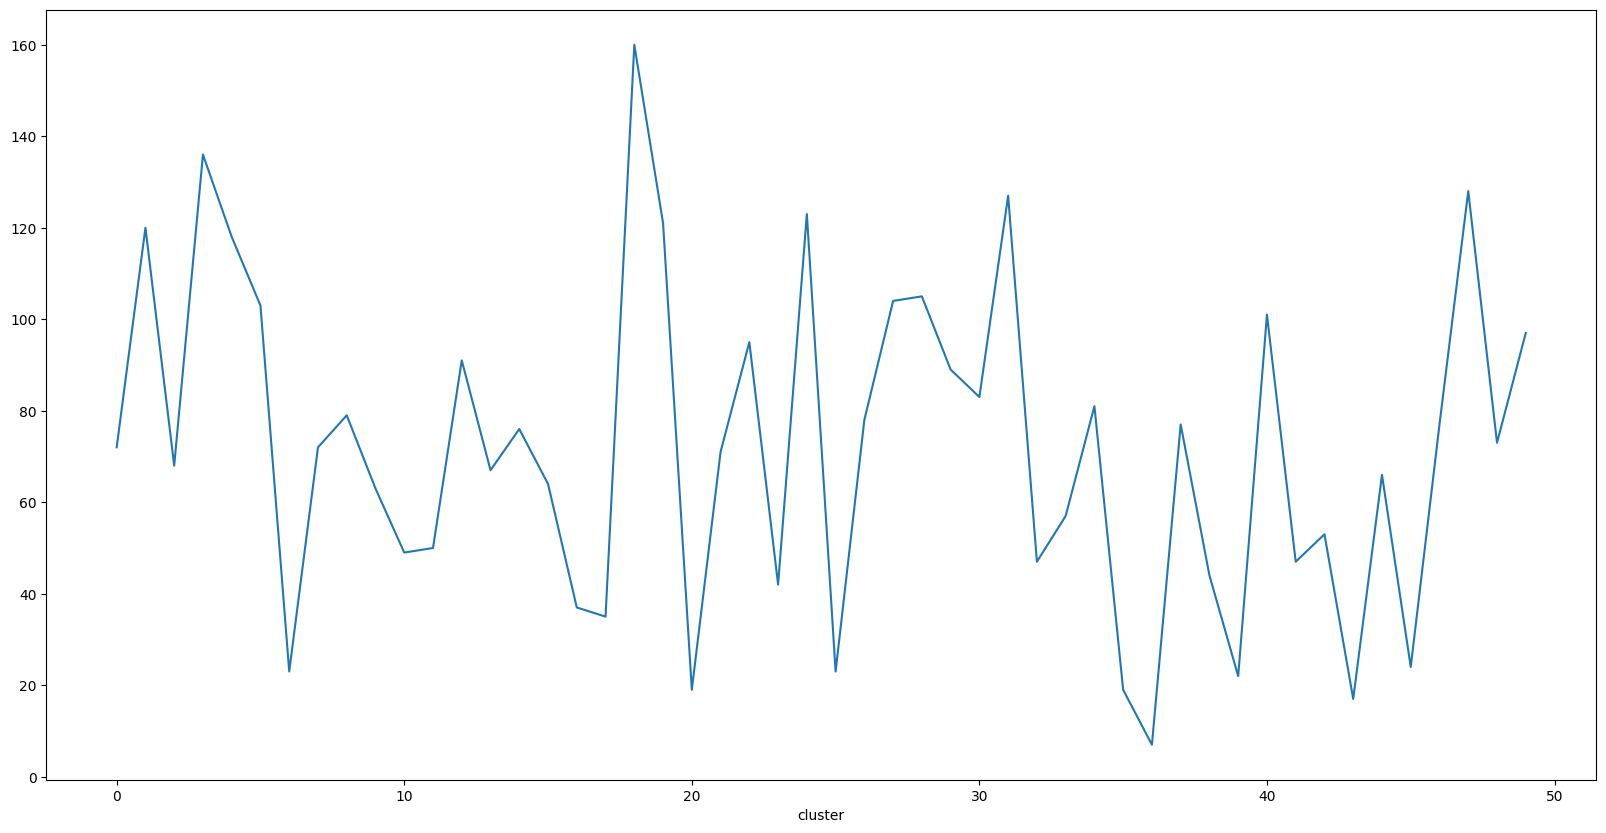

In [83]:
df_clustering.groupby(by="cluster").size().plot()

In [120]:
df_clustering.query('cluster == 12')

,compound,emotion_Happy,emotion_Angry,emotion_Surprise,emotion_Sad,emotion_Fear,cluster
63,0.8779,0.21,0.00,0.21,0.50,0.07,12
64,0.6597,0.15,0.08,0.15,0.54,0.08,12
66,0.9805,0.33,0.00,0.17,0.42,0.08,12
78,0.9519,0.14,0.14,0.29,0.43,0.00,12
129,0.9260,0.19,0.05,0.24,0.43,0.10,12
...,...,...,...,...,...,...,...
3355,0.9959,0.24,0.06,0.18,0.39,0.13,12
3375,0.9735,0.12,0.05,0.12,0.52,0.19,12
3380,0.9984,0.28,0.04,0.08,0.45,0.15,12
3402,0.9861,0.16,0.00,0.24,0.49,0.11,12


In [121]:
df.iloc[63]["lyrcis_preprocessed"]

"go possession go everything hear footstep slowly walking gently walk across lonely floor voice softly saying darling goodbye evermore go reason living go one dream go possession go everything memory turn back page see happy year we've love kept old heart beating shattered closing door go reason living go one dream go possession go everything go possession go everything"

In [122]:
df.iloc[64]["lyrcis_preprocessed"]

"offered penny thought told woman stay caught turned loved anyway broke heart i've got say baby rock heartache bought made bed sleeping i'm tired hearing friend baby rock well cried upon shoulder like baby i'm sorry 'bout trouble lady done like done i've used sympathy baby rock"

In [85]:
df_clustering.groupby(by="cluster").mean().round(2).sort_values(by='emotion_Happy', ascending=True)

,compound,emotion_Happy,emotion_Angry,emotion_Surprise,emotion_Sad,emotion_Fear
cluster,,,,,,
36,-0.21,0.00,0.00,0.00,0.00,0.00
39,0.31,0.02,0.00,0.05,0.91,0.02
20,-0.08,0.03,0.01,0.87,0.04,0.05
16,-0.83,0.04,0.03,0.59,0.20,0.15
11,-0.81,0.04,0.04,0.07,0.15,0.70
32,-0.83,0.05,0.04,0.09,0.70,0.13
38,0.75,0.05,0.03,0.22,0.57,0.13
35,0.50,0.05,0.33,0.04,0.53,0.04
23,0.73,0.06,0.02,0.05,0.07,0.80


<Axes: xlabel='cluster'>

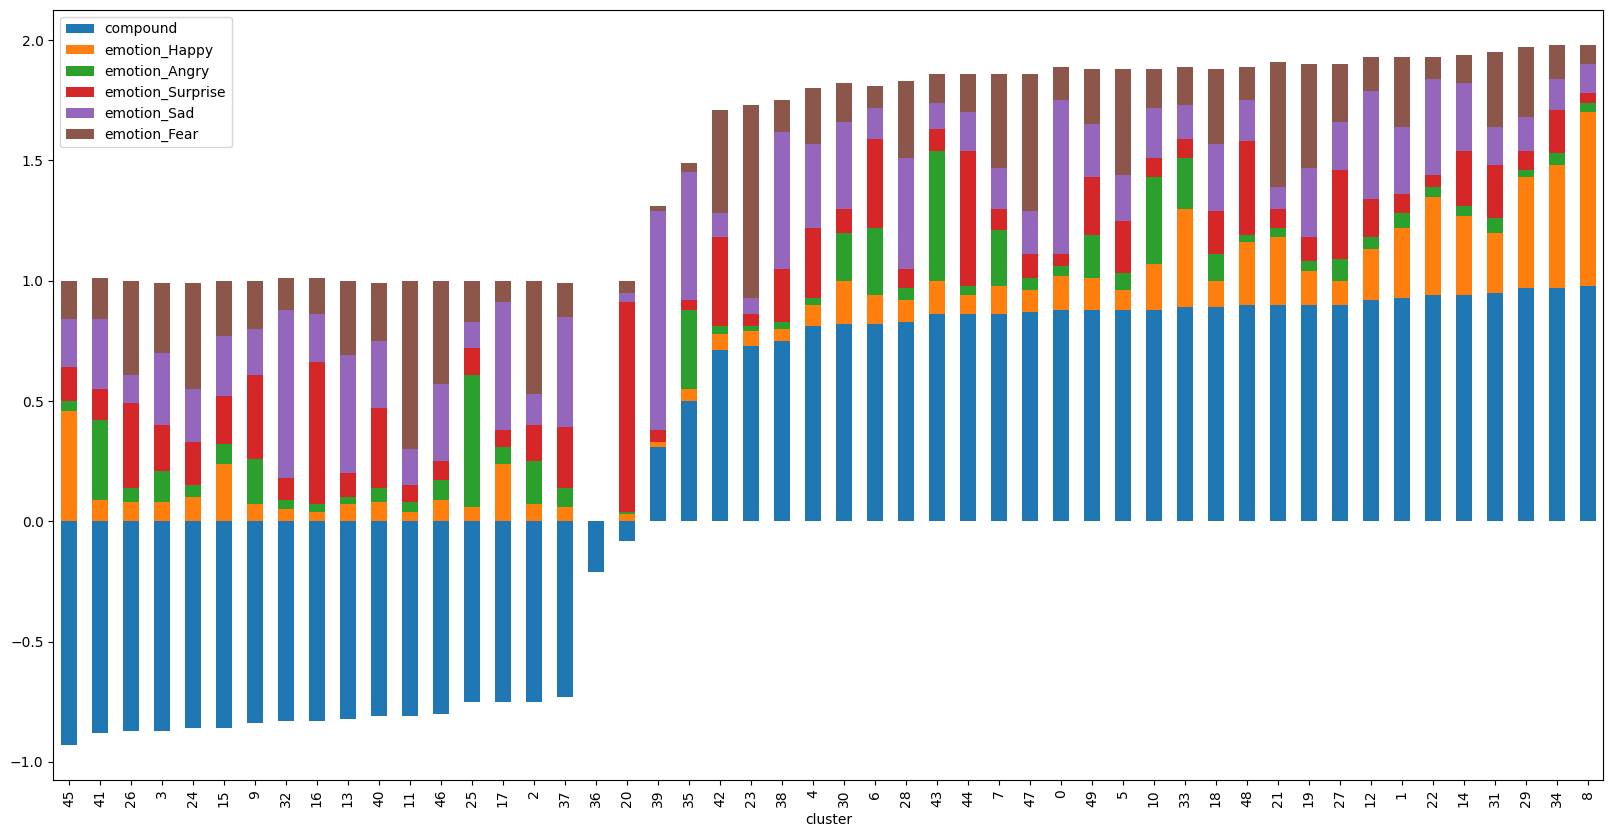

In [86]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

df_clustering.groupby(by="cluster").mean().round(2).sort_values(by='compound', ascending=True).plot.bar(stacked=True)

<Axes: xlabel='cluster'>

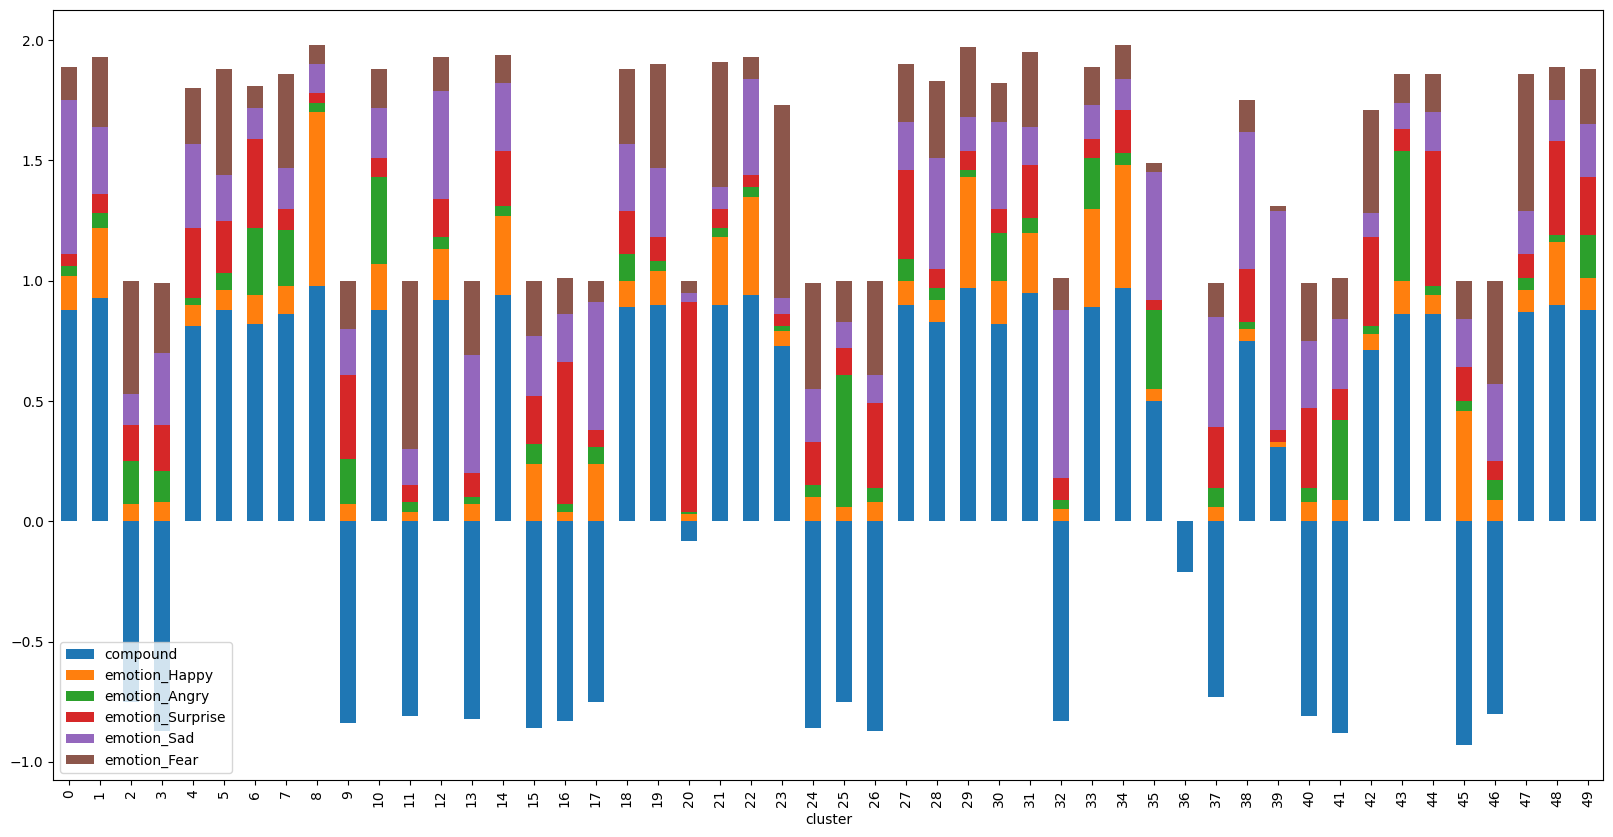

In [87]:
df_clustering.groupby(by="cluster").mean().round(2).plot.bar(stacked=True)

<Axes: xlabel='cluster'>

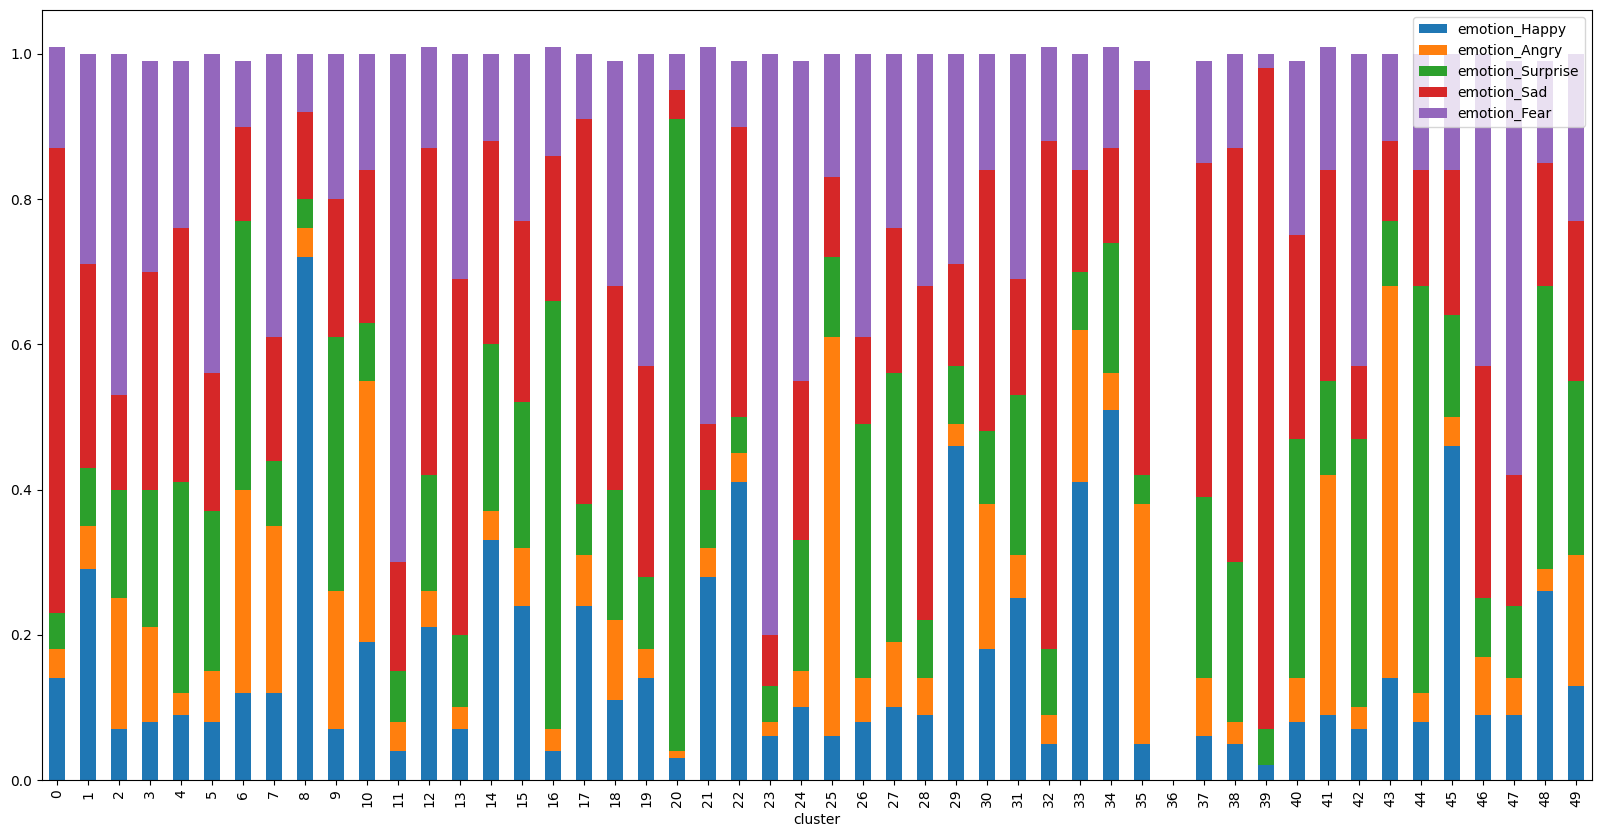

In [88]:
df_cluster_emotions = df_clustering[['emotion_Happy','emotion_Angry','emotion_Surprise','emotion_Sad','emotion_Fear','cluster']]
df_cluster_emotions.groupby(by="cluster").mean().round(2).plot.bar(stacked=True)

<Axes: xlabel='cluster'>

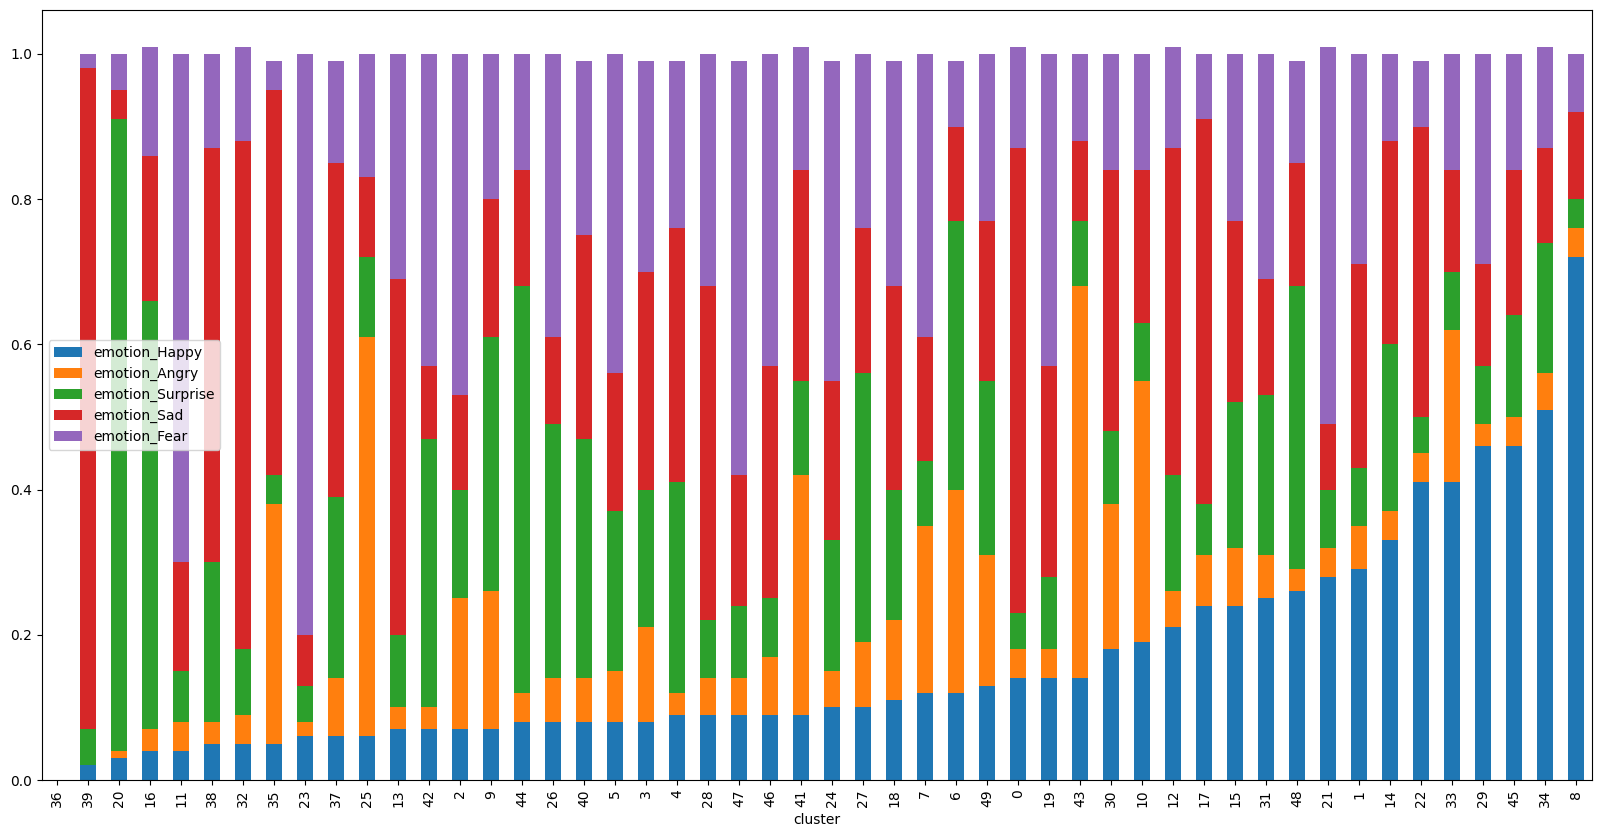

In [99]:
df_cluster_emotions.groupby(by="cluster").mean().round(2).sort_values(by=['emotion_Happy'], ascending=True).plot.bar(stacked=True)

<Axes: xlabel='cluster'>

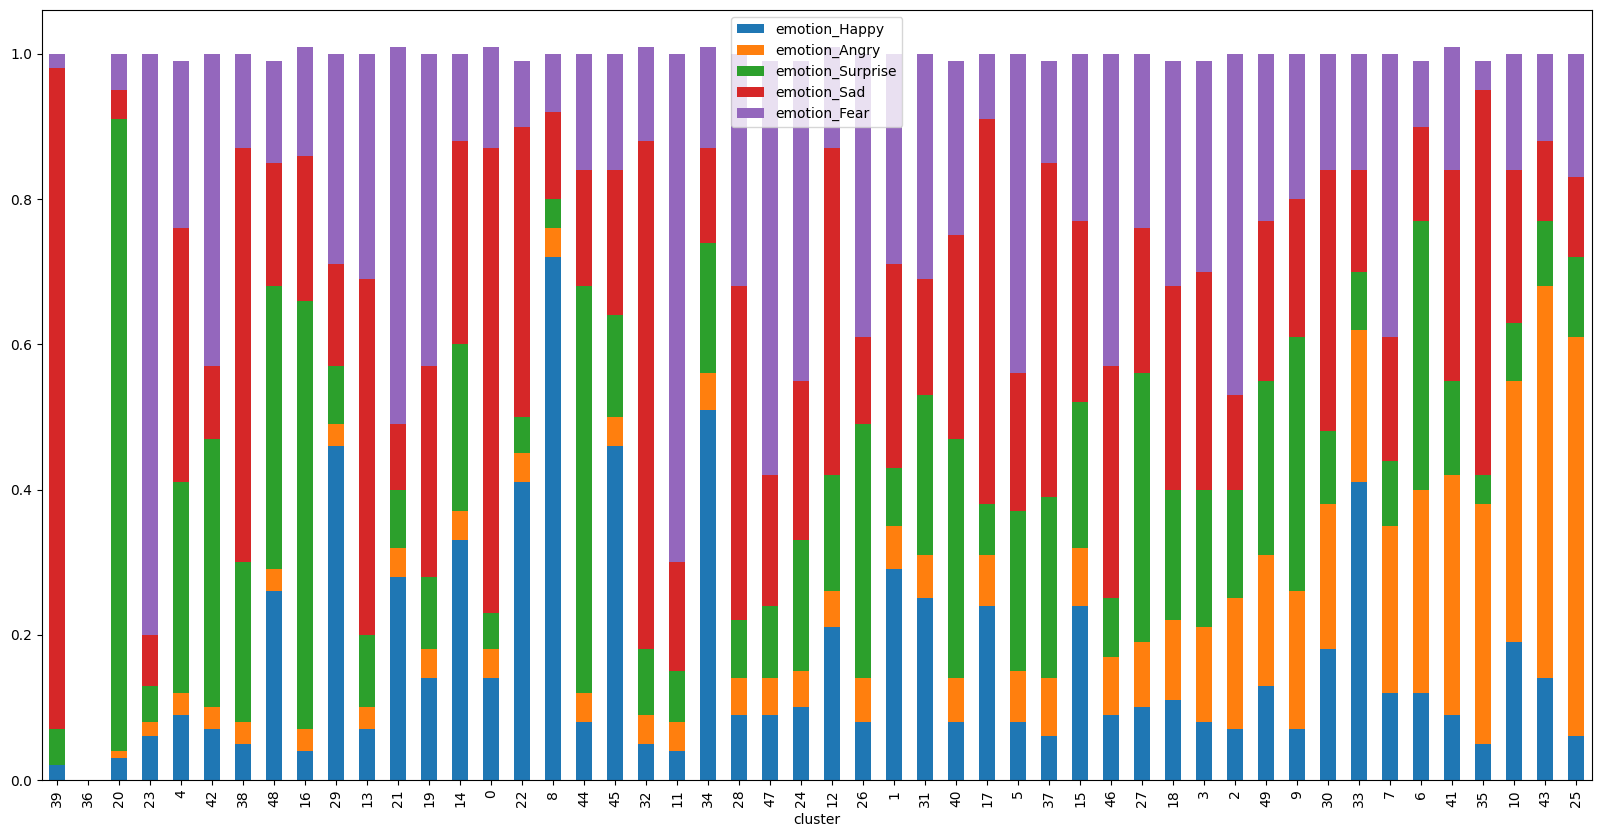

In [101]:
df_cluster_emotions.groupby(by="cluster").mean().round(2).sort_values(by=['emotion_Angry'], ascending=True).plot.bar(stacked=True)

<Axes: xlabel='cluster'>

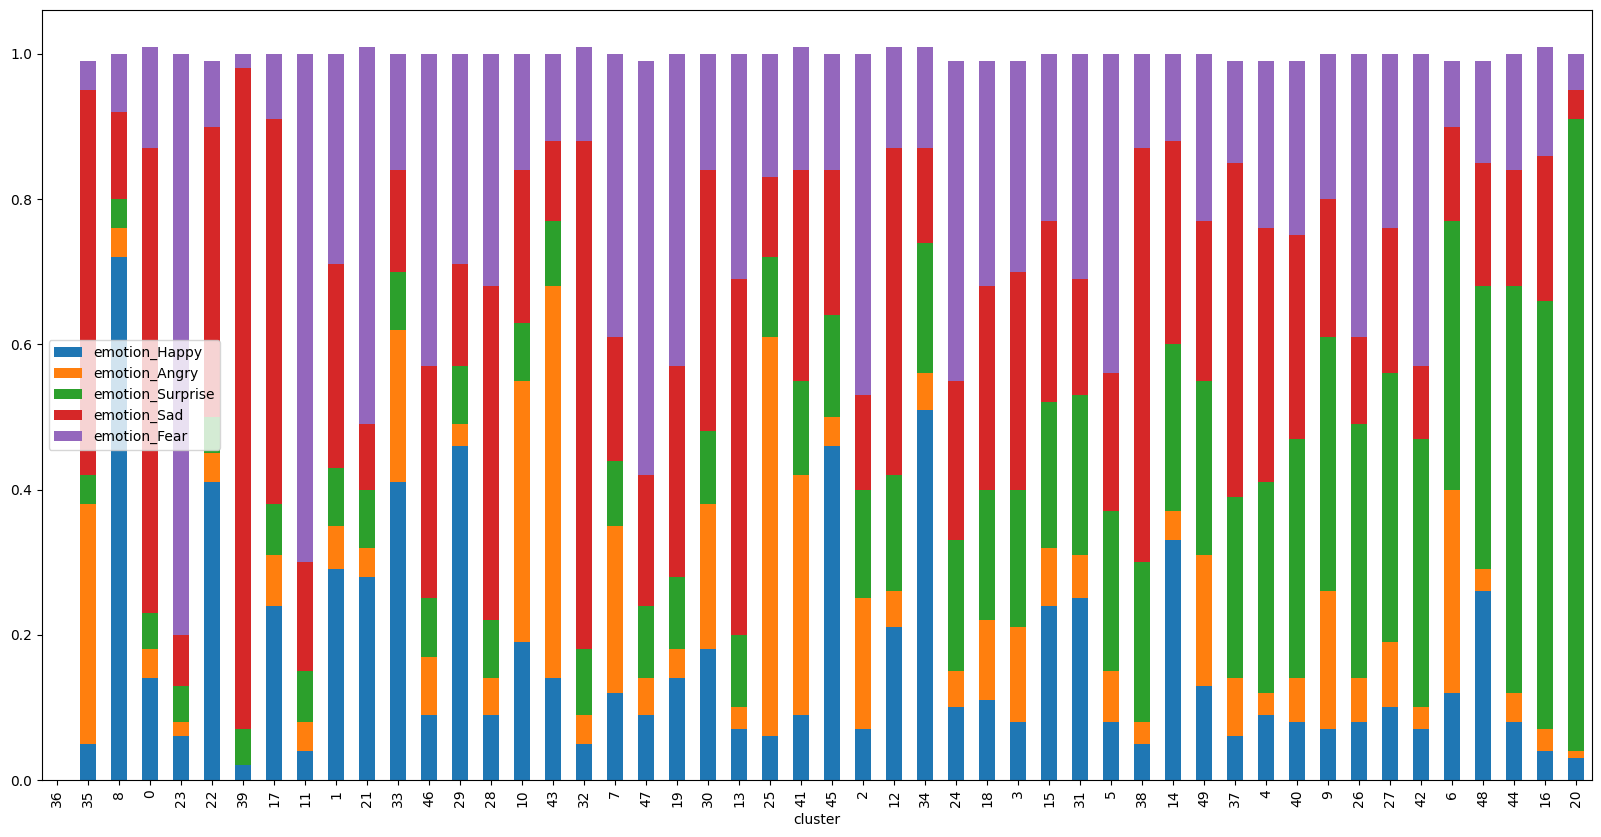

In [102]:
df_cluster_emotions.groupby(by="cluster").mean().round(2).sort_values(by=['emotion_Surprise'], ascending=True).plot.bar(stacked=True)

<Axes: xlabel='cluster'>

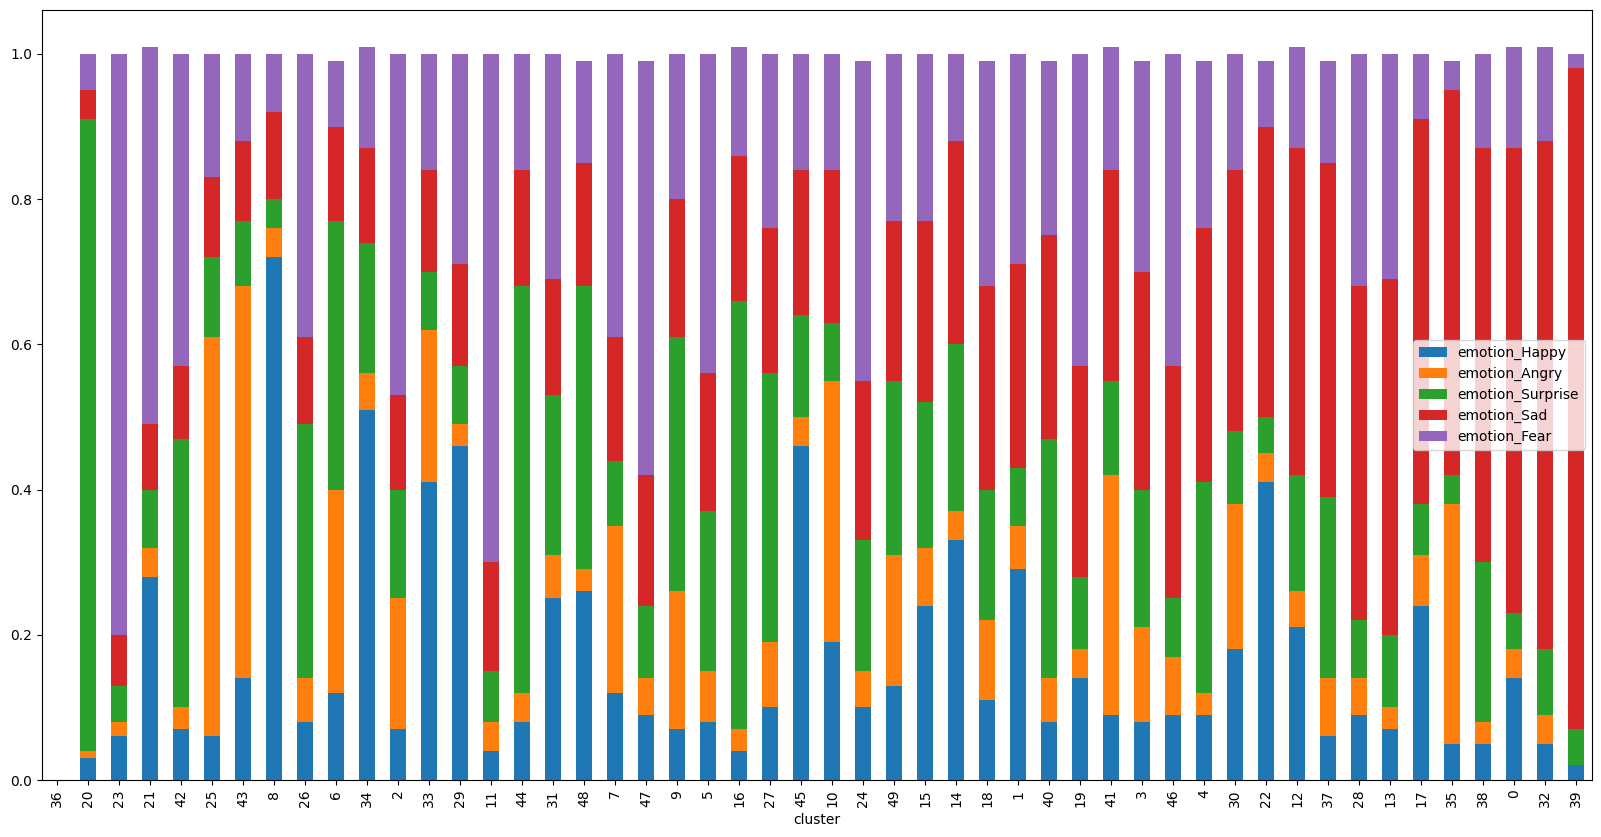

In [103]:
df_cluster_emotions.groupby(by="cluster").mean().round(2).sort_values(by=['emotion_Sad'], ascending=True).plot.bar(stacked=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                3600 non-null   object 
 1   tag                  3600 non-null   object 
 2   artist               3600 non-null   object 
 3   year                 3600 non-null   int64  
 4   views                3600 non-null   int64  
 5   features             3600 non-null   object 
 6   lyrics               3600 non-null   object 
 7   id                   3600 non-null   int64  
 8   decade               3600 non-null   object 
 9   lyrcis_preprocessed  3600 non-null   object 
 10  sentiment            3600 non-null   object 
 11  compound             3600 non-null   float64
 12  sentiment_category   3600 non-null   object 
 13  emotion              3600 non-null   object 
 14  cluster              3600 non-null   int32  
 15  emotion_Happy        3600 non-null   f

In [105]:
df.head()

,title,tag,artist,year,views,features,lyrics,id,decade,lyrcis_preprocessed,sentiment,compound,sentiment_category,emotion,cluster,emotion_Happy,emotion_Angry,emotion_Surprise,emotion_Sad,emotion_Fear
0,Rocky Mountain High,country,John Denver,1972,34529,{},[Verse 1]\nHe was born in the summer of his 27...,2873,1970s,born summer year comin' home place hed never l...,"{'neg': 0.11, 'neu': 0.824, 'pos': 0.066, 'com...",-0.8498,Negative,"{'Happy': 0.04, 'Angry': 0.01, 'Surprise': 0.0...",13,0.04,0.01,0.05,0.45,0.45
1,New Kid in Town,country,Eagles,1976,76529,{},"[Verse 1]\nThere's talk on the street, it soun...",54282,1970s,talk street sound familiar great expectation e...,"{'neg': 0.029, 'neu': 0.756, 'pos': 0.215, 'co...",0.9838,Positive,"{'Happy': 0.39, 'Angry': 0.03, 'Surprise': 0.1...",22,0.39,0.03,0.10,0.42,0.05
2,Pretty Maids All in a Row,country,Eagles,1976,21183,{},"[Verse 1]\nHi there, how are you? It's been a ...",54286,1970s,hi long time seems like we've come long way le...,"{'neg': 0.062, 'neu': 0.586, 'pos': 0.353, 'co...",0.9607,Positive,"{'Happy': 0.43, 'Angry': 0.0, 'Surprise': 0.0,...",29,0.43,0.00,0.00,0.14,0.43
3,Try and Love Again,country,Eagles,1976,13921,{},When you're out there on your own\nWhere your ...,54287,1970s,memory find like circle go around lost found c...,"{'neg': 0.068, 'neu': 0.663, 'pos': 0.268, 'co...",0.9905,Positive,"{'Happy': 0.52, 'Angry': 0.1, 'Surprise': 0.0,...",22,0.52,0.10,0.00,0.29,0.10
4,Margaritaville,country,Jimmy Buffett,1977,144670,{},[Verse 1]\nNibblin' on sponge cake\nWatchin' t...,60282,1970s,nibblin' sponge cake watchin' sun bake tourist...,"{'neg': 0.296, 'neu': 0.609, 'pos': 0.096, 'co...",-0.9758,Negative,"{'Happy': 0.04, 'Angry': 0.23, 'Surprise': 0.3...",9,0.04,0.23,0.31,0.31,0.12


In [117]:
df=df.drop(columns=['features'], axis=1)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                3600 non-null   object 
 1   tag                  3600 non-null   object 
 2   artist               3600 non-null   object 
 3   year                 3600 non-null   int64  
 4   views                3600 non-null   int64  
 5   id                   3600 non-null   int64  
 6   decade               3600 non-null   object 
 7   lyrcis_preprocessed  3600 non-null   object 
 8   sentiment            3600 non-null   object 
 9   compound             3600 non-null   float64
 10  sentiment_category   3600 non-null   object 
 11  emotion              3600 non-null   object 
 12  cluster              3600 non-null   int32  
 13  emotion_Happy        3600 non-null   float64
 14  emotion_Angry        3600 non-null   float64
 15  emotion_Surprise     3600 non-null   f

In [119]:
df.to_csv('data_v2_3600.csv',index=False)

In [ ]:
df_without_lyrics = df
df_without_lyrics.drop(['lyrics'], axis=1, inplace=True)

In [ ]:
df.to_csv('data_v1_without_lyrics_3600.csv',index=False)